<a href="https://colab.research.google.com/github/ricardogomesmatos/MilleniumComercial/blob/main/Projeto_Millenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leitura do campo comercial - Millenium - Setor Litoral**

Neste projeto, iniciado no dia 14/04/2022, estaremos simplificando em números e em gráficos alguns pontos para uma melhor visitação planejada. Com intuito de melhorias para o RCA e consequentemente melhorias para o grupo, abordaremos temas que implicam no custo do trabalho.

Na rota do litoral, na Millenium Comercial, atendemos 10 cidades. Com diferentes distâncias, o setor de viagem necessita de uma otimiazação para que o PDA seja de fato bem aproveitado.

Os códigos, CNPJS, razão social, endereço e número foram alterados para preservar os dados dos clientes.

# Custo Médio Mensal
- O estudo será feito de acordo com a média do valor da gasolina, no início do projeto;
- A distância baseia-se a partir da origem, Guarapari, para as outras cidades da Rota.

## Quilometragem para visitação - ROTA

In [2]:
# Importando as bibliotecas usadas no projeto

!pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

     |████████████████████████████████| 208 kB 5.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Distância em km da cidade local de acordo com o Google Maps - ida e volta
# Partindo do princípio que a cidade de partida é Guarapari

cidades = [['Guarapari', 40], ['Marataizes', 140], ['Anchieta', 60],['Alfredo Chaves', 104], ['Iconha', 102], ['Rio Novo do Sul', 140], ['Vargem Alta', 165], ['Itapemirim', 166
], ['Presidente Kenedy', 235], ['Piuma', 85]]

df = pd.DataFrame(cidades, columns=['Cidades', 'Km'])
df.set_index('Cidades', inplace=True)
print(df)

                    Km
Cidades               
Guarapari           40
Marataizes         140
Anchieta            60
Alfredo Chaves     104
Iconha             102
Rio Novo do Sul    140
Vargem Alta        165
Itapemirim         166
Presidente Kenedy  235
Piuma               85


## Variáveis

In [4]:
gasolina = 7.20 #Litro referente à cotação atual - editável -
alimentacao = 35 #Alimentação referente à cotação atual - editável -
gasto_medio = 13 #Consumo médio do carro - km/h

## Rotas/Custo Médio

In [5]:
# Criando um for a partir de um dicionário para descobrir o gasto médio necessário para visitação na cidade

dic = {'Guarapari': 40, 'Marataizes': 140, 'Anchieta': 60, 'Alfredo Chaves': 104, 'Iconha': 102, 'Rio Novo do Sul': 140, 'Vargem Alta': 165, 'Itapemirim': 166, 
      'Presidente Kenedy': 235, 'Piúma': 85}
dic_media_gasto = []
for i, u in dic.items():
  dic_media_gasto.append(dic)
  if i == 'Guarapari':
      print(f'Para trabalhar na rota de {i}, o RCA gastará em média \033[31mR$ {((u * gasolina) / gasto_medio):.2f}\033[37m/dia.')
  else:
      print(f'Para trabalhar na rota de {i}, o RCA gastará em média \033[31mR${(((u * gasolina) / gasto_medio) + alimentacao):.2f}\033[37m/dia.')

Para trabalhar na rota de Guarapari, o RCA gastará em média R$ 22.15/dia.
Para trabalhar na rota de Marataizes, o RCA gastará em média R$112.54/dia.
Para trabalhar na rota de Anchieta, o RCA gastará em média R$68.23/dia.
Para trabalhar na rota de Alfredo Chaves, o RCA gastará em média R$92.60/dia.
Para trabalhar na rota de Iconha, o RCA gastará em média R$91.49/dia.
Para trabalhar na rota de Rio Novo do Sul, o RCA gastará em média R$112.54/dia.
Para trabalhar na rota de Vargem Alta, o RCA gastará em média R$126.38/dia.
Para trabalhar na rota de Itapemirim, o RCA gastará em média R$126.94/dia.
Para trabalhar na rota de Presidente Kenedy, o RCA gastará em média R$165.15/dia.
Para trabalhar na rota de Piúma, o RCA gastará em média R$82.08/dia.


Considerando que para um melhor aproveitamento da rota, encontramos na logística um grande aliado na economia e junto, otimizar o tempo na visitação. A frequência [hz] de atendimento é quinzenal, sendo assim, há cidade, que, pelo fluxo de venda e distância lógica, não há necessidade de visita semanal.

# Base de clientes
A base de clientes é fornecida para cara representante todo início de cade mês.
Neste primeiro momento, o estudo será feito de modo setorial. Vamos ignorar os valores e resultados, focando só nos gastos para uma visitação por cidade.

In [6]:
# Abrindo a tabela de clientes

tabela_clientes = pd.read_excel('RCA BASE RICARDO2.xlsx')
tabela_clientes

,CÓD,CNPJ,RAZÃO SOCIAL,ENDEREÇO,Nº,BAIRRO,CIDADE,Coluna1
0,1,CNPJ1,CLIENTE 1,ENDERECO 1,1,ALFREDO CHAVES,ALFREDO CHAVES,NaN
1,2,CNPJ2,CLIENTE 2,ENDERECO 2,2,CENTRO,ALFREDO CHAVES,NaN
2,3,CNPJ3,CLIENTE 3,ENDERECO 3,3,CENTRO,ALFREDO CHAVES,NaN
3,4,CNPJ4,CLIENTE 4,ENDERECO 4,4,CENTRO,ALFREDO CHAVES,NaN
4,5,CNPJ5,CLIENTE 5,ENDERECO 5,5,ALVORADA,ANCHIETA,NaN
...,...,...,...,...,...,...,...,...
84,85,CNPJ85,CLIENTE 85,ENDERECO 85,85,CENTRO,RIO NOVO DO SUL,NaN
85,86,CNPJ86,CLIENTE 86,ENDERECO 86,86,CENTRO,RIO NOVO DO SUL,NaN
86,87,CNPJ87,CLIENTE 87,ENDERECO 87,87,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN
87,88,CNPJ88,CLIENTE 88,ENDERECO 88,88,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN


In [7]:
# Renomeando a coluna para melhorar a identificação 

renomear = {'CÓD' : 'cod',
            'CNPJ' : 'CNPJ',
            'RAZÃO SOCIAL' : 'razao_social',
            'ENDEREÇO' : 'endereco',
            'Nº' : 'nº',
            'BAIRRO' : 'bairro',
            'CIDADE': 'cidade',
       'Coluna1' : 'coluna1'} 

tabela_clientes = tabela_clientes.rename(columns = renomear)

In [8]:
# Excluindo a coluna1, desnecessária para nossa análise
# Usando o código como index

tabela_clientes = tabela_clientes.drop(columns=['coluna1'])
tabela_clientes.set_index('cod', inplace=True)
tabela_clientes.head(5)

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
1,CNPJ1,CLIENTE 1,ENDERECO 1,1,ALFREDO CHAVES,ALFREDO CHAVES
2,CNPJ2,CLIENTE 2,ENDERECO 2,2,CENTRO,ALFREDO CHAVES
3,CNPJ3,CLIENTE 3,ENDERECO 3,3,CENTRO,ALFREDO CHAVES
4,CNPJ4,CLIENTE 4,ENDERECO 4,4,CENTRO,ALFREDO CHAVES
5,CNPJ5,CLIENTE 5,ENDERECO 5,5,ALVORADA,ANCHIETA


In [9]:
# Igualando nomes das cidades

tabela_clientes.replace({'MARATAIZES' : 'MARATAÍZES', 'PIUMA': 'PIÚMA'}, inplace=True)
tabela_clientes['cidade'].value_counts()

GUARAPARI             32
ITAPEMIRIM            12
MARATAÍZES            12
ANCHIETA              10
RIO NOVO DO SUL        7
PIÚMA                  6
ALFREDO CHAVES         4
ICONHA                 4
PRESIDENTE KENNEDY     1
VARGEM ALTA            1
Name: cidade, dtype: int64

<BarContainer object of 10 artists>

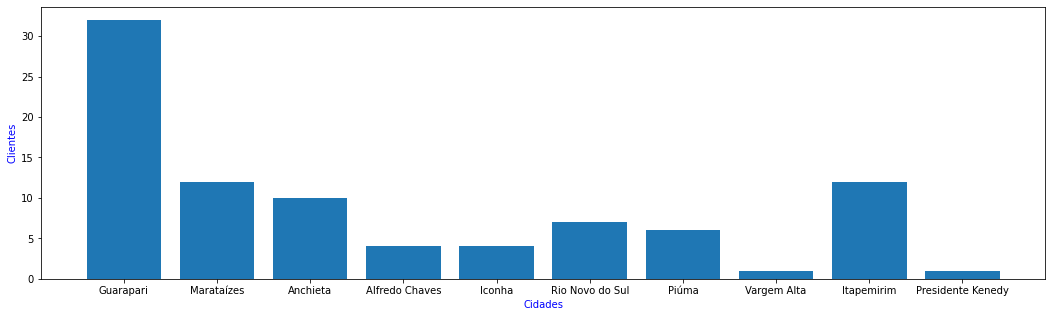

In [10]:
# Criando um gráfico no Matplotlib representando a quantidade de clientes por cidade

clientes_base = ['Guarapari', 'Marataízes', 'Anchieta', 'Alfredo Chaves', 'Iconha', 'Rio Novo do Sul', 'Piúma', 'Vargem Alta', 'Itapemirim', 'Presidente Kenedy']
quantidade_base = [32, 12, 10, 4, 4, 7, 6, 1, 12, 1]

plt.figure(figsize=(18,5))
plt.ylabel('Clientes', color = 'blue')
plt.xlabel('Cidades', color = 'blue')
plt.bar(clientes_base, quantidade_base)


Neste gráfico, conseguimos reparar a participação massiva do setor de Guarapari no litoral relacionado a PDV.

#Frequência de visitação quinzenal
De modo manual, eu escolhi, atender algumas cidades por preferência. Os motivos relacionam 'faturamento', 'necessidade' e 'logistica'. Como um exemplo, Marataízes por ser uma cidade muito procurada por todos RCA, o foco permanece no primeiro dia da semana e por questões lógicas, tentamos conciliar com cidades próximas para reduzir o custo.

In [11]:
# Determinando, de forma manual, a preferência por atendimento, visando volume de vendas

frequencia_quinzenal = [4, 2, 2, 1, 2 , 2, 1, 1, 1]
dias_da_semana = ['segunda', 'terça', 'quarta', 'quinta', 'sexta']
hz = {'Cidades': ['Guarapari', 'Marataízes', 'Anchieta', 'Alfredo Chaves', 'Iconha', 'Piuma', 'Rio Novo do Sul', 'Vargem Alta', 'Itapemirim', 'Presidente Kenedy'], 
      'Frequência_Quinzenal': [4, 2, 2, 1, 2 , 2, 1, 1, 1, 1]}
df = pd.DataFrame(data = hz)
df.set_index('Cidades', inplace=True)
df

,Frequência_Quinzenal
Cidades,
Guarapari,4
Marataízes,2
Anchieta,2
Alfredo Chaves,1
Iconha,2
Piuma,2
Rio Novo do Sul,1
Vargem Alta,1
Itapemirim,1


PRIMEIRA SEMANA

In [12]:
# Conforme a visitação é quinzenal, por escolha, determino as cidades da primeira semana
# Os gastos estão atrelados ao estudo de custo iniciado no início do projeto

ds = {'Cidades': ['Marataízes/Itapemirim', 'Anchieta/Piúma', 'Iconha/Rio Novo do sul', 'Guarapari', 'Guarapari'], 
      'Atendimento' : ['segunda', 'terça', 'quarta', 'quinta', 'sexta'], 'Gasto' : [126.94, 82.08, 112.54, 22.15, 22.15]}
ds = pd.DataFrame(data=ds)
ds.set_index('Cidades', inplace = True)
ds

,Atendimento,Gasto
Cidades,,
Marataízes/Itapemirim,segunda,126.94
Anchieta/Piúma,terça,82.08
Iconha/Rio Novo do sul,quarta,112.54
Guarapari,quinta,22.15
Guarapari,sexta,22.15


In [13]:
# Print gasto da primeira semana

total_1 = ds.Gasto.sum().round(2)
print(f' Na primeira semana, serão gastos R$ {total_1}.')

 Na primeira semana, serão gastos R$ 365.86.


SEGUNDA SEMANA

In [14]:
# Conforme a visitação é quinzenal, por escolha, determino as cidades da segunda semana
# Os gastos estão atrelados ao estudo de custo iniciado no início do projeto

ss = {'Cidades': ['Marataízes/Presidente Kennedy', 'Anchieta/Piúma', 'Iconha/Alfredo Chaves', 'Guarapari', 'Guarapari'], 
      'Atendimento' : ['segunda', 'terça', 'quarta', 'quinta', 'sexta'], 'Gasto' : [165.15, 82.08, 92.60, 22.15, 22.15]}
ss = pd.DataFrame(data=ss)
ss.set_index('Cidades', inplace = True)
ss

,Atendimento,Gasto
Cidades,,
Marataízes/Presidente Kennedy,segunda,165.15
Anchieta/Piúma,terça,82.08
Iconha/Alfredo Chaves,quarta,92.60
Guarapari,quinta,22.15
Guarapari,sexta,22.15


In [15]:
# Print gasto da primeira semana

total_2 = ss.Gasto.sum().round(2)
print(f' Na segunda semana, serão gastos R$ {total_2}.')

 Na segunda semana, serão gastos R$ 384.13.


Conforme o mês têm aproximadamente 4 semanas, teremos de gasto:

In [16]:
# Print total de gasto no mês

tot = (total_1 * 2 ) + (total_2 *2)
print(f'Por mês, o RCA que trabalhar no setor do Litoral, gastará em média R$ {tot} para estar visitando todos os clientes, desconsiderando deslocamento dentro das cidades.')

Por mês, o RCA que trabalhar no setor do Litoral, gastará em média R$ 1499.98 para estar visitando todos os clientes, desconsiderando deslocamento dentro das cidades.


# Faturamento geral por cidade
Com base na venda mensal por cidade, conseguimos ter noção do volume de venda por setor, que nos auxilia na escolha da rota.

In [17]:
# Importando a tabela de vendas dos clientes

tabela_vendas = pd.read_excel('VENDASTICKETMEDIO3.xlsx')
tabela_vendas.head(5)

,CÓD,CNPJ,RAZÃO SOCIAL,ENDEREÇO,Nº,BAIRRO,CIDADE,PDA,VOLUME GERAL
0,1,CNPJ1,CLIENTE 1,ENDERECO 1,1,CENTRO,ALFREDO CHAVES,NaN,102.10
1,2,CNPJ2,CLIENTE 2,ENDERECO 2,2,ALFREDO CHAVES,ALFREDO CHAVES,502.99,1674.62
2,3,CNPJ3,CLIENTE 3,ENDERECO 3,3,CENTRO,ALFREDO CHAVES,2567.00,7902.54
3,4,CNPJ4,CLIENTE 4,ENDERECO 4,4,CENTRO,ALFREDO CHAVES,NaN,629.34
4,5,CNPJ5,CLIENTE 5,ENDERECO 5,5,PRAIA DE CASTELHANOS,ANCHIETA,1233.60,1233.60


In [18]:
# Renomeando as cidades com o mesmo nome

tabela_vendas['CIDADE'].value_counts()
tabela_vendas.replace({'MARATAIZES' : 'MARATAÍZES', 'PIUMA': 'PIÚMA'}, inplace=True)
tabela_vendas
tabela_vendas['CIDADE'].value_counts()

GUARAPARI             32
ITAPEMIRIM            12
MARATAÍZES            12
ANCHIETA              10
RIO NOVO DO SUL        7
PIÚMA                  6
ALFREDO CHAVES         4
ICONHA                 4
PRESIDENTE KENNEDY     1
VARGEM ALTA            1
Name: CIDADE, dtype: int64

In [19]:
# # Renomeando a coluna para melhorar a identificação 

renomear_vendas = {'CÓD' : 'cod',
            'CNPJ' : 'CNPJ',
            'RAZÃO SOCIAL' : 'razao_social',
            'ENDEREÇO' : 'endereco',
            'Nº' : 'nº',
            'BAIRRO' : 'bairro',
            'CIDADE': 'cidade'} 

tabela_vendas = tabela_vendas.rename(columns = renomear_vendas)

In [20]:
# Colocando o código com index

tabela_vendas.set_index('cod', inplace=True)
tabela_vendas.head(5)

,CNPJ,razao_social,endereco,nº,bairro,cidade,PDA,VOLUME GERAL
cod,,,,,,,,
1,CNPJ1,CLIENTE 1,ENDERECO 1,1,CENTRO,ALFREDO CHAVES,NaN,102.10
2,CNPJ2,CLIENTE 2,ENDERECO 2,2,ALFREDO CHAVES,ALFREDO CHAVES,502.99,1674.62
3,CNPJ3,CLIENTE 3,ENDERECO 3,3,CENTRO,ALFREDO CHAVES,2567.00,7902.54
4,CNPJ4,CLIENTE 4,ENDERECO 4,4,CENTRO,ALFREDO CHAVES,NaN,629.34
5,CNPJ5,CLIENTE 5,ENDERECO 5,5,PRAIA DE CASTELHANOS,ANCHIETA,1233.60,1233.60


In [21]:
# Volume geral de vendas 

volume_geral = tabela_vendas['VOLUME GERAL'].sum().round(3)

O valor total de pedido no mês foi de R$ 86461.60

## Faturamento Geral por cidade - função - DEF

In [22]:
# Faturamento por cidade usando função 

def rota_litoral(setor, dataset=tabela_vendas):
    selecao = tabela_vendas['cidade'] == setor
    n1 = tabela_vendas[selecao].shape[0]
    n2 = tabela_vendas[selecao]['VOLUME GERAL'].sum().round(2)
    print(f' A cidade de {setor} tem {n1} clientes com um faturamento de R$ {n2}')


In [23]:
rota_litoral('GUARAPARI', tabela_vendas)

 A cidade de GUARAPARI tem 32 clientes com um faturamento de R$ 26776.38


In [24]:
rota_litoral('ANCHIETA', tabela_vendas)

 A cidade de ANCHIETA tem 10 clientes com um faturamento de R$ 9477.97


In [25]:
rota_litoral('PIÚMA', tabela_vendas)

 A cidade de PIÚMA tem 6 clientes com um faturamento de R$ 5038.44


In [26]:
rota_litoral('MARATAÍZES', tabela_vendas)

 A cidade de MARATAÍZES tem 12 clientes com um faturamento de R$ 17575.27


In [27]:
rota_litoral('ICONHA', tabela_vendas)

 A cidade de ICONHA tem 4 clientes com um faturamento de R$ 5041.78


In [28]:
rota_litoral('ALFREDO CHAVES', tabela_vendas)

 A cidade de ALFREDO CHAVES tem 4 clientes com um faturamento de R$ 10308.6


In [29]:
rota_litoral('RIO NOVO DO SUL', tabela_vendas)

 A cidade de RIO NOVO DO SUL tem 7 clientes com um faturamento de R$ 3719.61


In [30]:
rota_litoral('ITAPEMIRIM', tabela_vendas)

 A cidade de ITAPEMIRIM tem 12 clientes com um faturamento de R$ 9806.49


In [31]:
rota_litoral('PRESIDENTE KENNEDY', tabela_vendas)

 A cidade de PRESIDENTE KENNEDY tem 1 clientes com um faturamento de R$ 0.0


In [32]:
rota_litoral('VARGEM ALTA', tabela_vendas)

 A cidade de VARGEM ALTA tem 1 clientes com um faturamento de R$ 268.14


## Faturamento Geral por cidade - Gráfico


In [33]:
# Groupby das vendas por cidade

faturamento_por_cidade = tabela_vendas[['cidade', 'VOLUME GERAL']].groupby('cidade').sum().round(2)
faturamento_por_cidade

,VOLUME GERAL
cidade,
ALFREDO CHAVES,10308.60
ANCHIETA,9477.97
GUARAPARI,26776.38
ICONHA,5041.78
ITAPEMIRIM,9806.49
MARATAÍZES,17575.27
PIÚMA,5038.44
PRESIDENTE KENNEDY,0.00
RIO NOVO DO SUL,3719.61


In [34]:
# Criando dicionário para as cidades com o seu faturamento

dlist = faturamento_por_cidade.to_dict()
dict_lista = {'ALFREDO CHAVES': 10308.6,
  'ANCHIETA': 7926.89,
  'GUARAPARI': 26776.38,
  'ICONHA': 5041.78,
  'ITAPEMIRIM': 9806.49,
  'MARATAÍZES': 17575.27,
  'PIÚMA': 5038.44,
  'PRESIDENTE KENNEDY': 0.0,
  'RIO NOVO DO SUL': 3719.61,
  'VARGEM ALTA': 268.14}

In [35]:
 x = dict_lista.keys()
 y = dict_lista.values()

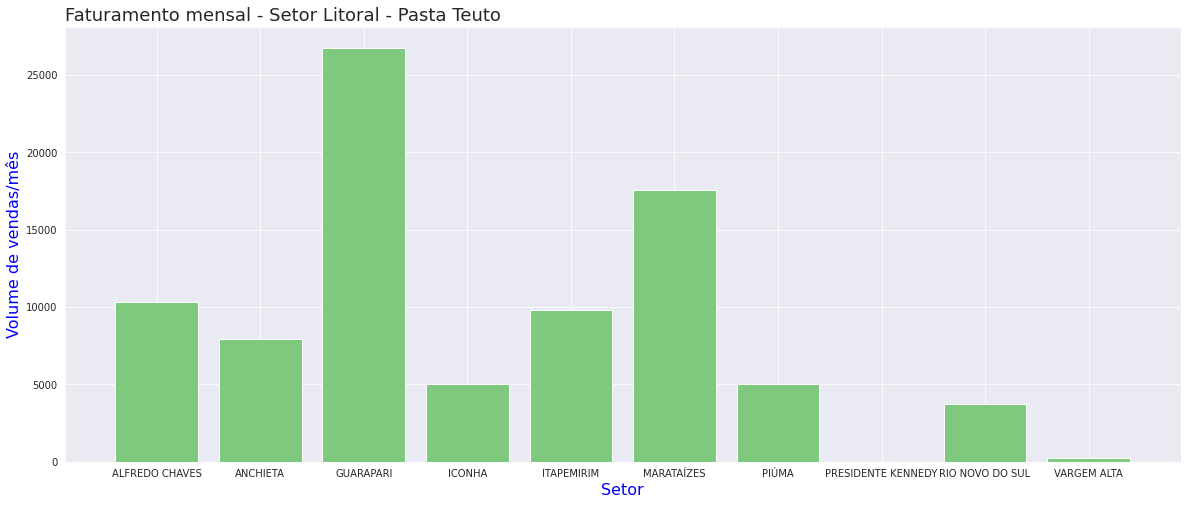

In [36]:
# Em gráfico, o faturamento geral por cidade

sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.ylabel('Volume de vendas/mês', color = 'blue', fontsize=16)
plt.xlabel('Setor', color = 'blue', fontsize=16)
plt.title('Faturamento mensal - Setor Litoral - Pasta Teuto', loc='left', fontsize=18)
x = plt.bar(x, y)


# Vendas por PDA
PDA - Personal Development Analysis \\
Neste estudo, perceberemos a diferença entre a venda total e a venda de PDA, atentando-se em Guarapari, que é a cidade local dos RCA em questão.


In [37]:
# Dropando valores nulos da coluna PDA

tv = tabela_vendas.dropna()
tv.head(5)

,CNPJ,razao_social,endereco,nº,bairro,cidade,PDA,VOLUME GERAL
cod,,,,,,,,
2,CNPJ2,CLIENTE 2,ENDERECO 2,2,ALFREDO CHAVES,ALFREDO CHAVES,502.99,1674.62
3,CNPJ3,CLIENTE 3,ENDERECO 3,3,CENTRO,ALFREDO CHAVES,2567.00,7902.54
5,CNPJ5,CLIENTE 5,ENDERECO 5,5,PRAIA DE CASTELHANOS,ANCHIETA,1233.60,1233.60
6,CNPJ6,CLIENTE 6,ENDERECO 6,6,CENTRO,ANCHIETA,394.43,502.99
9,CNPJ9,CLIENTE 9,ENDERECO 9,9,DA JUSTICA,ANCHIETA,712.45,1006.16


In [38]:
# Agrupando a tabela pela coluna cidade para detalhar as vendas de PDA e geral

pda_por_cidade = tv[['cidade', 'PDA', 'VOLUME GERAL']].groupby('cidade').sum().round(2)
pda_por_cidade

,PDA,VOLUME GERAL
cidade,,
ALFREDO CHAVES,3069.99,9577.16
ANCHIETA,3337.65,4449.40
GUARAPARI,8748.72,19938.78
ICONHA,2918.97,3068.10
ITAPEMIRIM,230.85,802.71
MARATAÍZES,1341.31,3864.58
PIÚMA,191.34,2012.72
RIO NOVO DO SUL,483.35,1435.78


In [39]:
# Dicionário de vendas no PDA

dict_pda = pda_por_cidade.to_dict()
dict_pda = { 'ALFREDO CHAVES':3069.99,
'ANCHIETA': 3337.65,
'GUARAPARI': 8748.72,
'ICONHA': 2918.97,
'ITAPEMERIM': 230.85,
'MARATAÍZES': 1341.31,
'PIÚMA': 191.34,
'PRESIDENTE KENNEDY': 0,
'RIO NOVO DO SUL': 483.35,
'VARGEM ALTA':0}

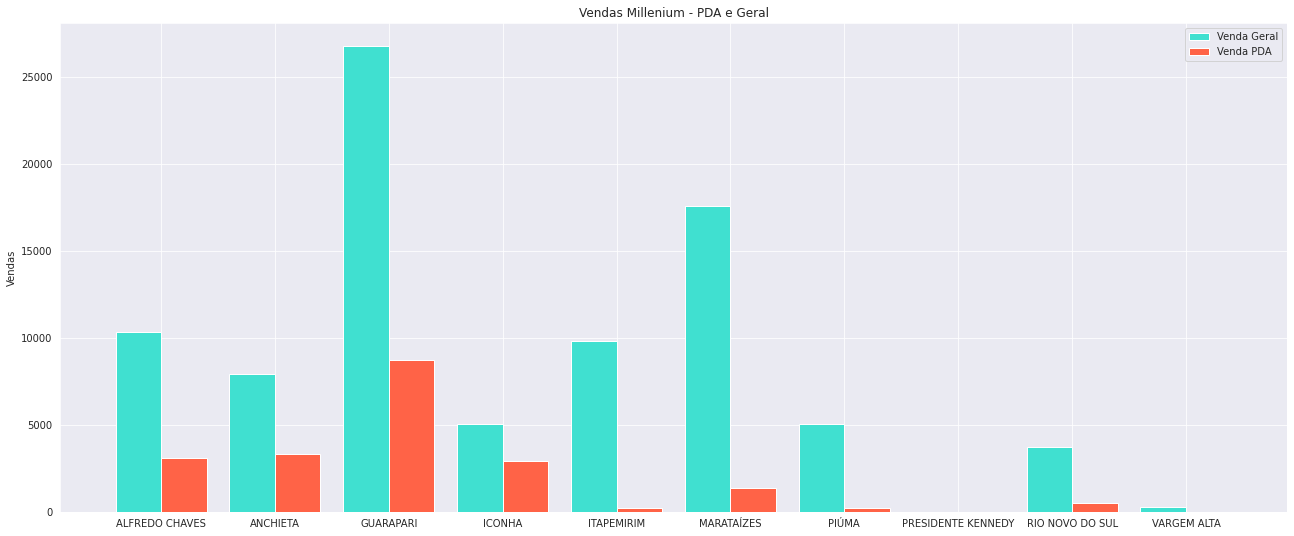

In [40]:
# Gráfico comparativo entre PDA e venda total

rota = ['ALFREDO CHAVES', 'ANCHIETA', 'GUARAPARI', 'ICONHA', 'ITAPEMIRIM', 'MARATAÍZES', 'PIÚMA', 'PRESIDENTE KENNEDY', 'RIO NOVO DO SUL','VARGEM ALTA']
venda_geral = dict_lista.values()
venda_pda = dict_pda.values()
x = np.arange(len(rota))
largura = 0.40
fig,ax = plt.subplots(figsize = (22,9))

grupo1 = ax.bar(x - largura/2, venda_geral, largura, label = 'Venda Geral', color = 'turquoise')
grupo2 = ax.bar(x + largura/2, venda_pda, largura, label = 'Venda PDA', color = 'tomato')
ax.set_title('Vendas Millenium - PDA e Geral')
ax.set_ylabel('Rota')
ax.set_ylabel('Vendas')
ax.set_xticks(x)
ax.set_xticklabels(rota)
ax.legend()            
plt.show()

No gráfico acima, temos uma resposta relacionada ao nosso estudo. Percebemos que nos setores distantes, o PDA não tem se efetivado.


#CONCLUSÃO

Considerando que o foco da empresa se envolve na melhoria do PDA, de acordo com o estudo de custo/mês, o RCA gastaria em torno de R$1499.98 para visitar todas as cidades da rota. 

Para um melhor trabalho no PDA, a otimização do tempo, melhoria na logística e redução de custo mensal é de suma importância. Desta forma, sugiro um estudo para reduzir o setor e aumentar o volume da pasta. Este setor de viagem não nos permite visitarmos com excelência todos os nossos clientes da base, com frequência e sequência, afetando diretamente a necessidade da empresa com o foco no PDA.

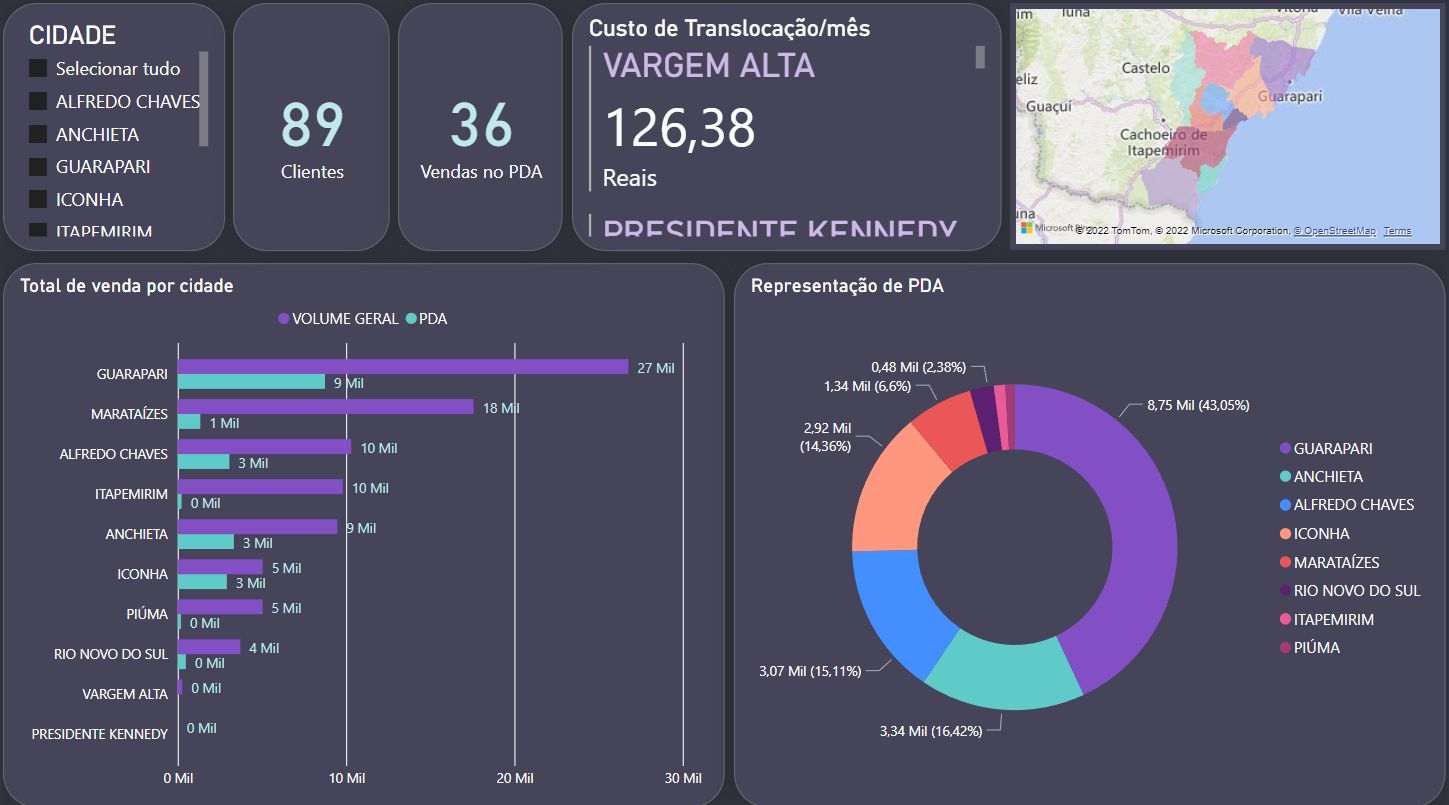

In [41]:
import cv2
from google.colab.patches import cv2_imshow
imagem = cv2.imread('dash.png')
cv2_imshow(imagem)
#Print do Dashboard Power BI

# ATUALIZAÇÃO
O projeto foi apresentado ao supervisor no dia 20/04/2022 e no dia 27/04/2022 a gerência da empresa alterou a rota dos RCAs, colocando em prática as análises apresentadas neste projeto.